In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

dataset = data = pd.read_csv("income.csv")
independent_variable = data["Age"]
dependent_variable = data["Income"]
dataset
print(data)

        Name  Age  Income
0        Rob   27   70000
1    Michael   29   90000
2      Mohan   29   61000
3     Ismail   28   60000
4       Kory   42  150000
5     Gautam   39  155000
6      David   41  160000
7     Andrea   38  162000
8       Brad   36  156000
9   Angelina   35  130000
10    Donald   37  137000
11       Tom   26   45000
12    Arnold   27   48000
13     Jared   28   51000
14     Stark   29   49500
15    Ranbir   32   53000
16    Dipika   40   65000
17  Priyanka   41   63000
18      Nick   43   64000
19      Alia   39   80000
20       Sid   41   82000
21     Abdul   39   58000


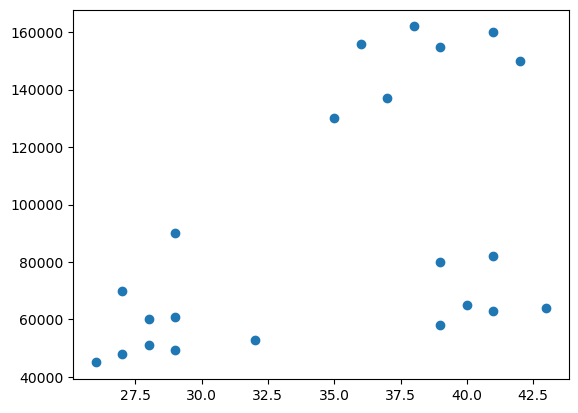

In [2]:
plt.scatter(data.Age, data.Income)

In [3]:
km = KMeans(n_clusters=3)
km


KMeans(n_clusters=3)

        Name  Age  Income  cluster
0        Rob   27   70000        2
1    Michael   29   90000        2
2      Mohan   29   61000        0
3     Ismail   28   60000        0
4       Kory   42  150000        1
5     Gautam   39  155000        1
6      David   41  160000        1
7     Andrea   38  162000        1
8       Brad   36  156000        1
9   Angelina   35  130000        1
10    Donald   37  137000        1
11       Tom   26   45000        0
12    Arnold   27   48000        0
13     Jared   28   51000        0
14     Stark   29   49500        0
15    Ranbir   32   53000        0
16    Dipika   40   65000        0
17  Priyanka   41   63000        0
18      Nick   43   64000        0
19      Alia   39   80000        2
20       Sid   41   82000        2
21     Abdul   39   58000        0



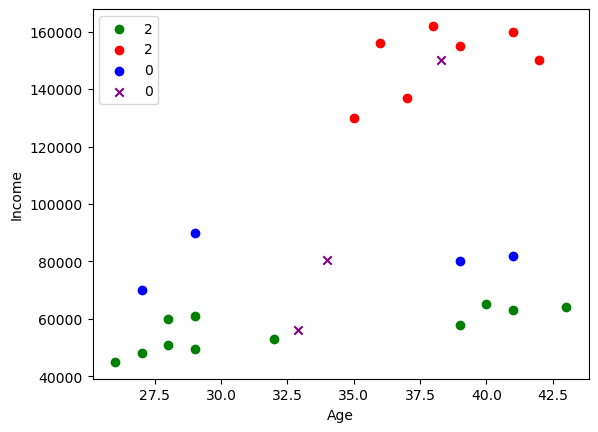

In [4]:
target_data = data[['Age','Income']]
y_predicted = km.fit_predict(target_data)
y_predicted


data["cluster"] = y_predicted
print(data)
df1 = data[data["cluster"] == 0]
df2 = data[data["cluster"] == 1]
df3 = data[data["cluster"] == 2]

plt.scatter(df1["Age"], df1["Income"], color="green")
plt.scatter(df2["Age"], df2["Income"], color="red")
plt.scatter(df3["Age"], df3["Income"], color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='x',label='centroid')


plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(data.cluster)
print()

In [5]:
# Pre-Processing Age And Income

scaler = MinMaxScaler()

scaler.fit(data[['Income']])
data["Income"] = scaler.transform(data[['Income']])


scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])


print(data)

        Name       Age    Income  cluster
0        Rob  0.058824  0.213675        2
1    Michael  0.176471  0.384615        2
2      Mohan  0.176471  0.136752        0
3     Ismail  0.117647  0.128205        0
4       Kory  0.941176  0.897436        1
5     Gautam  0.764706  0.940171        1
6      David  0.882353  0.982906        1
7     Andrea  0.705882  1.000000        1
8       Brad  0.588235  0.948718        1
9   Angelina  0.529412  0.726496        1
10    Donald  0.647059  0.786325        1
11       Tom  0.000000  0.000000        0
12    Arnold  0.058824  0.025641        0
13     Jared  0.117647  0.051282        0
14     Stark  0.176471  0.038462        0
15    Ranbir  0.352941  0.068376        0
16    Dipika  0.823529  0.170940        0
17  Priyanka  0.882353  0.153846        0
18      Nick  1.000000  0.162393        0
19      Alia  0.764706  0.299145        2
20       Sid  0.882353  0.316239        2
21     Abdul  0.764706  0.111111        0


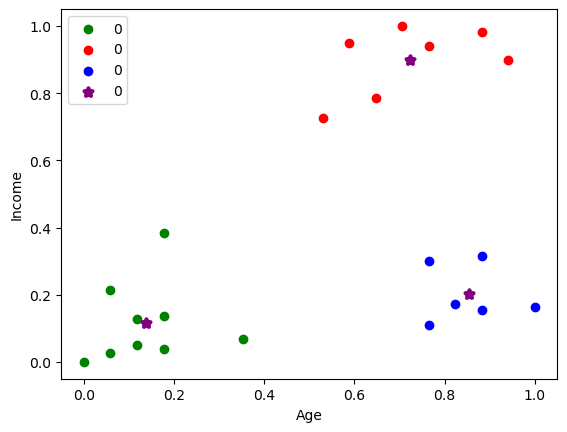

In [6]:
target_data = data[['Age','Income']]
y_predicted = km.fit_predict(target_data)
y_predicted



data["cluster"] = y_predicted
df1 = data[data["cluster"] == 0]
df2 = data[data["cluster"] == 1]
df3 = data[data["cluster"] == 2]

plt.scatter(df1["Age"], df1["Income"], color="green")
plt.scatter(df2["Age"], df2["Income"], color="red")
plt.scatter(df3["Age"], df3["Income"], color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid', linewidths=3)


plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(data.cluster)

   

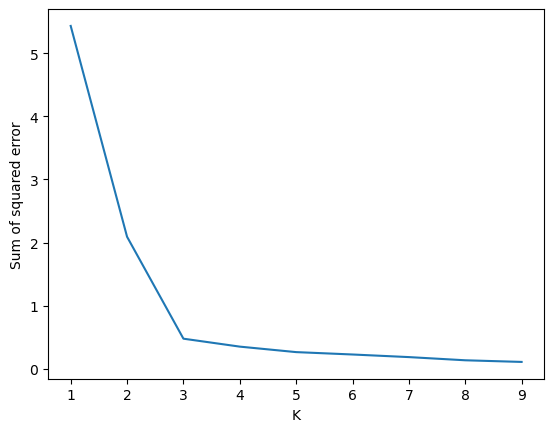

In [7]:
""" 
Elbow Method To determine K value 
"""

sse = []
k_range = range(1, 10)
for index in k_range:
    km = KMeans(n_clusters=index)
    km.fit(data[['Age', 'Income']])
    sse.append(km.inertia_)
    

 
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)    